In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao7"
CAND1_PATH = "data/paredao7/babu.csv"
CAND2_PATH = "data/paredao7/manu.csv"
CAND3_PATH = "data/paredao7/victorhugo.csv"


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment"]]
cand2 = candidate2_df[["tweet", "sentiment"]]
cand3 = candidate3_df[["tweet", "sentiment"]]

# Babu

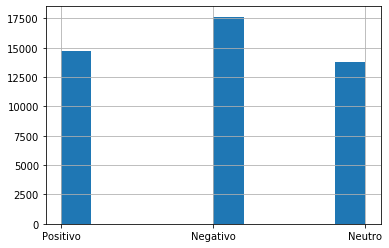

In [5]:
cand1["sentiment"].hist()

In [6]:
cand1

,tweet,sentiment
0,Eu amo o Babu na moralzinha\nTorço muito por e...,Positivo
1,Rejeitado da casa uma única amizade fodahhhhhhh,Positivo
2,Mas na hora de falar que @BabuSantana deveria ...,Negativo
3,@VictorGambogi eu vou chorar mano,Positivo
4,Eu quero um dia poder abraçar ele e dizer que ...,Positivo
...,...,...
46165,"As torcidas do ""grupão"" vai dividir votos SIM ...",Neutro
46166,babu: a\neu: CARALHO Q HOMEM INTELIGENTE\n\n#B...,Positivo
46167,liguem o ppv agora pq o babu tá dando AULAS. #...,Neutro
46168,Babu dizendo que recebeu convite pra ir ao sho...,Positivo


# Manu

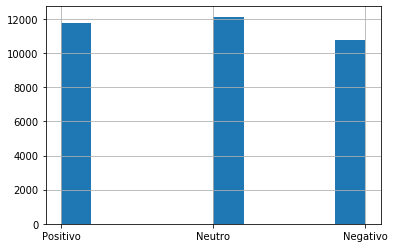

In [7]:
cand2["sentiment"].hist()

In [8]:
cand2

,tweet,sentiment
0,Manu maravilhosaa❤,Positivo
1,@boninho eu já sabia #ForaVitorHugo TEAM @ma...,Neutro
2,Por causa do BBB vou ter que seguir a Manu e o...,Positivo
3,E @manugavassi segue defendendo kkkkkk vai tom...,Neutro
4,NÃO! Afinal como diz @BiaAndradeOfc SOMOS SER...,Neutro
...,...,...
34623,"As torcidas do ""grupão"" vai dividir votos SIM ...",Neutro
34624,MEU DEUS KKKK A MANU TA FULL PISTOLA SENHOR IM...,Neutro
34625,a realidade é que a torcida da gizelly e manu ...,Negativo
34626,Mano o paredão não pode ser manu x prior\nVai ...,Negativo


# Victor Hugo

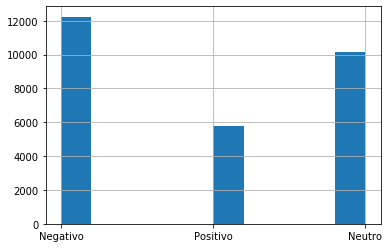

In [9]:
cand3["sentiment"].hist()

In [10]:
cand3

,tweet,sentiment
0,89% saída do @victorhugotex\n#ForaPombo #ForaV...,Negativo
1,@victorhugotex vc merece coisas maravilhosas n...,Positivo
2,"Tadinho, força pra ele e boa sorte",Positivo
3,A rivalidade fica dentro da casa! Estamos junt...,Positivo
4,"Isso mesmo, fanatismo é loucura .Respeito ,is...",Negativo
...,...,...
28154,"O jogo da discórdia amanhã vai ser tudoooooo, ...",Positivo
28155,Ansioso pra saber como a edição vai mostrar a ...,Negativo
28156,Pyong passando com a hipnose no fantástico. Ma...,Neutro
28157,Victor Hugo já pd ir se despedindo #BBB20 #For...,Negativo


# Quantidades absolutas

In [11]:
candidates = {"babu": cand1, "manu_gavassi": cand2, "victor_hugo": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,14706,13814,17650
manu_gavassi,11741,12131,10756
victor_hugo,5780,10136,12243


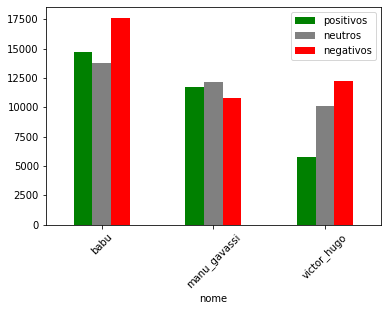

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
babu,0.318519,0.299199,0.382283
manu_gavassi,0.339061,0.350323,0.310616
victor_hugo,0.205263,0.359956,0.434781


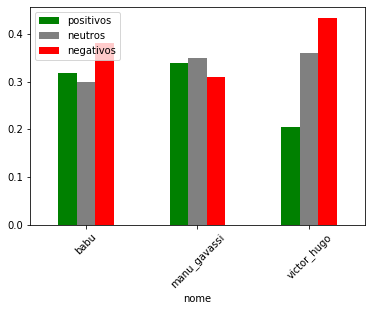

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
babu,0.456325,0.382861,0.434205
manu_gavassi,0.364322,0.336216,0.264607
victor_hugo,0.179353,0.280923,0.301188


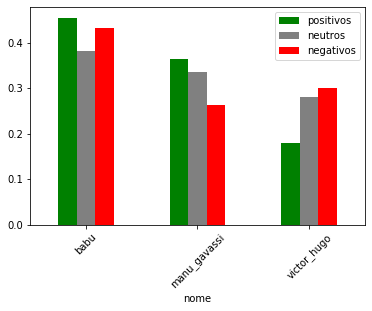

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Seleção de atributos

In [22]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_pct")

In [23]:
participantes_info = get_participantes_info()
paredoes_info = get_paredoes_info()

In [24]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [25]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [26]:
atributes_df["seguidores"], atributes_df["rejeicao"] = followers, rejection

In [27]:
atributes_df

,positivos,neutros,negativos,positivos_pct,neutros_pct,negativos_pct,seguidores,rejeicao
nome,,,,,,,,
babu,14706,13814,17650,0.318519,0.299199,0.382283,317268,0.0460
manu_gavassi,11741,12131,10756,0.339061,0.350323,0.310616,4298841,0.1018
victor_hugo,5780,10136,12243,0.205263,0.359956,0.434781,14044,0.8522


In [28]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))